📊 Dataset Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500 

D:\python\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3683 - loss: 0.7164
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6432 - loss: 0.6719
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7347 - loss: 0.6422
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8206 - loss: 0.6019
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7853 - loss: 0.5773
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7907 - loss: 0.5481
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7628 - loss: 0.5408
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7873 - loss: 0.5045
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.4876
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8194 - loss: 0.4425
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8229 - loss: 0.4303
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.4647


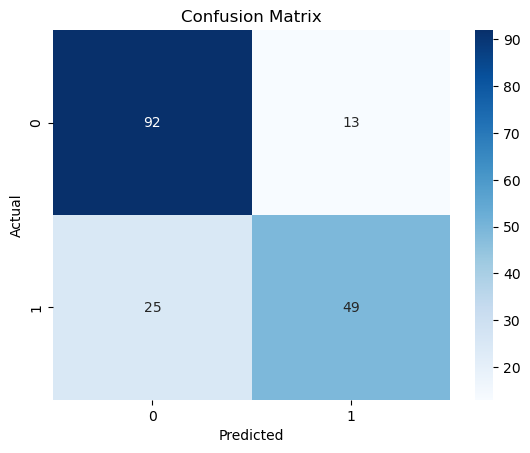


🔍 Accuracy: 0.79
🎯 Precision: 0.79
🎯 Recall: 0.66


In [1]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Step 2: Load the Dataset
df = pd.read_csv("train.csv")  # Download from Kaggle

print("📊 Dataset Preview:")
print(df.head())

# ✅ Step 3: Preprocessing
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])  # Remove unnecessary columns

# Fill missing age with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode Sex and Embarked
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# ✅ Step 4: Feature and Target Split
X = df.drop('Survived', axis=1)
y = df['Survived']

# ✅ Step 5: Normalize Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Step 7: Build the Model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# ✅ Step 8: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Step 9: Train the Model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# ✅ Step 10: Evaluate the Model
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")

# ✅ Step 11: Prediction
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# ✅ Step 12: Evaluation Metrics
print("\n📌 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(f"\n🔍 Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"🎯 Precision: {precision_score(y_test, y_pred):.2f}")
print(f"🎯 Recall: {recall_score(y_test, y_pred):.2f}")


In [2]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,True
1,1,1,1,38.000000,1,0,71.2833,False,False
2,1,3,1,26.000000,0,0,7.9250,False,True
3,1,1,1,35.000000,1,0,53.1000,False,True
4,0,3,0,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,False,True
887,1,1,1,19.000000,0,0,30.0000,False,True
888,0,3,1,29.699118,1,2,23.4500,False,True
889,1,1,0,26.000000,0,0,30.0000,False,False


In [10]:
# ✅ Sample Passenger Data (example input)
# Columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
pclass=int(input('class'))
sex=int(input('sex'))
age=int(input('Age'))
sibs=int(input('sibs'))
parents=int(input('parents'))
fare=float(input('fare'))
embarq=int(input('queens'))
embarks=int(input('southampton'))
sample_passenger = np.array([[pclass, sex, age, sibs, parents, fare, embarq, embarks]])  # 3rd class, female, 28 yrs, no relatives, low fare, Embarked 'S'

# ✅ Apply same scaling as used during training
sample_scaled = scaler.transform(sample_passenger)

# ✅ Predict using trained model
prediction_prob = model.predict(sample_scaled)
prediction_class = (prediction_prob > 0.5).astype(int)

# ✅ Print Result

print(f"🧪 Survival Probability: {prediction_prob[0][0]:.2f}")
print(f"🎯 Final Prediction: {'Survived' if prediction_class[0][0] == 1 else 'Did NOT Survive'}")


class 1
sex 1
Age 22
sibs 1
parents 1
fare 500
queens 1
southampton 0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
🧪 Survival Probability: 0.98
🎯 Final Prediction: Survived


D:\python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [4]:
min_max_df = pd.DataFrame({
    'Min Value': X.min(),
    'Max Value': X.max()
})

In [5]:
print(min_max_df)

           Min Value Max Value
Pclass             1         3
Sex                0         1
Age             0.42      80.0
SibSp              0         8
Parch              0         6
Fare             0.0  512.3292
Embarked_Q     False      True
Embarked_S     False      True
